# What's Normal? -- Temperature, Gender, and Heart Rate

## The Data

- We will study with a dataset on body temperature, gender, and heart rate.
- We'll try to understand the concepts like 
    - true means, 
    - confidence intervals, 
    - one sample t test, 
    - independent samples t test,
    - normality check, 
    - homogenity of variance check (Levene's test),
    - correlation,
    - regression.


- The data were derived from an article in the Journal of the American Medical Association entitled "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich" (Mackowiak, Wasserman, and Levine 1992).
- Source: http://jse.amstat.org/v4n2/datasets.shoemaker.html

## Data Column Reference

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Variable</th>
    <th class="tg-0lax">Type</th>
    <th class="tg-0lax">Explanation</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">temperature</td>
    <td class="tg-0pky">Numeric</td>
    <td class="tg-0pky">Body Temperature (degrees Fahrenheit)</td>
  </tr>
  <tr>
    <td class="tg-0pky">gender</td>
    <td class="tg-0pky">Categorical</td>
    <td class="tg-0pky">Gender (1=Male, 2=Female)</td>
  </tr>
  <tr>
    <td class="tg-0lax">heart_rate</td>
    <td class="tg-0lax">Numeric</td>
    <td class="tg-0lax">Heart Rate (beats per minute)</td>
  </tr>
</tbody>
</table>

## Data Preparation

⭐ Import **pandas**, **scipy.stats**, **seaborn**, and **matplotlib.pyplot** libraries

In [35]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

⭐Ignore warnings

In [36]:
import warnings
warnings.filterwarnings('ignore')

⭐Run the following code to read in the "normtemp.dat.txt" file.

In [38]:
df = pd.read_csv('http://jse.amstat.org/datasets/normtemp.dat.txt', delim_whitespace=True, names=["temperature", "gender", "heart_rate"])

In [39]:
df.head()

,temperature,gender,heart_rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  130 non-null    float64
 1   gender       130 non-null    int64  
 2   heart_rate   130 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


⭐Replace the gender levels [1, 2]  with ["male", "female"]

In [40]:
df["gender"] = df["gender"].replace(to_replace=[1,2], value=["male", "female"])

In [41]:
df.head()

,temperature,gender,heart_rate
0,96.3,male,70
1,96.7,male,71
2,96.9,male,74
3,97.0,male,80
4,97.1,male,73


## Task-1. Is the *body temperature* population mean  98.6 degrees F?

⭐What is the mean for body temperature?

In [8]:
df.temperature.mean()

98.24923076923078

⭐What is the standard deviation for body temperature?

In [9]:
df.temperature.std()

0.7331831580389456

⭐What is the standard error of the mean for body temperature?

In [11]:
df.temperature.std() / np.sqrt(df.shape[0])

0.06430441683789102

In [12]:
df.temperature.sem()

0.06430441683789102

⭐Plot the distribution of body temperature. You can either use *Pandas* or *Seaborn*.

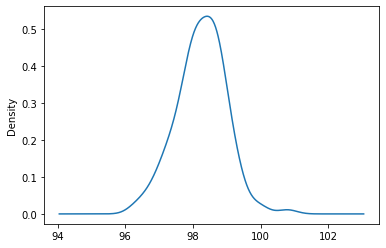

In [13]:
df.temperature.plot.density();

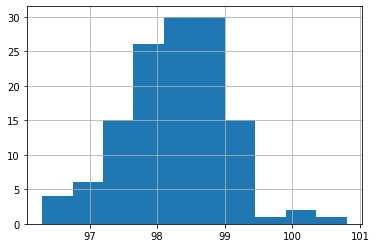

In [15]:
df.temperature.hist();

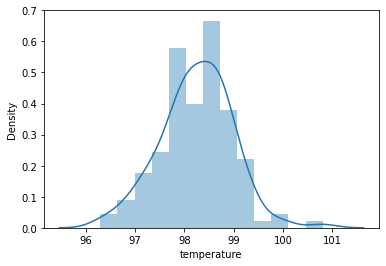

In [17]:
sns.distplot(df["temperature"]);

**KEY NOTE:**

The objective of Statistics often is <u>*to make inferences about unknown population parameters*</u> based on information contained in sample data. 

These inferences are phrased in one of two ways: 

 - as estimates of the respective parameters or 
 - as tests of hypotheses about their values.

**Statistical inference**. How to estimate population attributes, based on sample data. How to test statistical hypotheses.

### Confidence Interval using the t Distribution

**Key Notes about Confidence Intervals**

💡A point estimate is a single number. 

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval. 

💡However, confidence intervals provide much more information and are preferred when making inferences.  

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval for this sample of 130 subjects. (Use 90%, 95% and 99% CIs)

In [18]:
stats.sem(df.temperature)

0.06430441683789102

In [20]:
#95% Confidence Interval
stats.t.interval(alpha=0.95, # confidence level
                 df= len(df)-1, # degreees of feedom (n-1)
                 loc=df.temperature.mean(), # sample mean
                 scale=df.temperature.sem()) # standard of the mean

(98.12200290560804, 98.37645863285351)

In [21]:
#95% Confidence Interval
stats.norm.interval(alpha=0.95, # confidence level
                 loc=df.temperature.mean(), # sample mean
                 scale=df.temperature.sem()) # standard of the mean

(98.12319642818166, 98.3752651102799)

Our confidence interval for μ is (98.12200290560803, 98.3764586328535).

In repeated sampling, approximately 95% of all intervals of the form X̄ ± t*(s/√n) include μ, the true mean body temperature.

In [23]:
#Write a for loop calculate 90%, 95% and 99% CIs around the sample mean

lower = []
upper = []

for i in [0.90, 0.95, 0.99]:
    ci = stats.t.interval(i, df= len(df)-1, loc=df.temperature.mean(), scale=df.temperature.sem())
    lower.append(ci[0])
    upper.append(ci[1])
    print("CI {i}%: {interval}".format(i=int(i*100), interval=ci))

CI 90%: (98.1426943241349, 98.35576721432666)
CI 95%: (98.12200290560804, 98.37645863285351)
CI 99%: (98.08110824239759, 98.41735329606396)


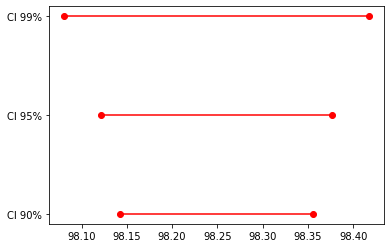

In [24]:
plt.plot((lower,upper), (range(len(lower)),range(len(upper))), 'ro-',color='red')
plt.yticks(range(3),["CI 90%","CI 95%","CI 99%"]);

### One Sample t Test

⭐**Investigate the given task by using One Sample t Test.**

**Key Notes about Hypothesis Testing (Significance Testing)**

💡Assumptions 

💡Null and Alternative Hypothesis

💡Test Statistic 

💡P-value

💡Conclusion

___🚀First, check the normality. *Use scipy.stats.shapiro

<i>H<i/><sub>0</sub>: "the variable is normally distributed"<br>
<i>H<i/><sub>1</sub>: "the variable is not normally distributed"

In [42]:
stat, p = stats.shapiro(df.temperature)

In [43]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


H0: mu = 98.698.6
H1: mu!= 

___🚀Then, conduct the significance test. *Use scipy.stats.ttest_1samp*

In [45]:
oneSamp = stats.ttest_1samp(df.temperature, popmean=98.6)
oneSamp

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

The sample standard deviation is .73, so the standard error of the mean is .064. Thus the calculated t (using the sample mean of 98.25) is -5.45.

In [46]:
# Compare p-value and alpha
alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


## Task-2. Is There a Significant Difference Between Males and Females in Normal Temperature?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [50]:
df.groupby("gender").describe().temperature

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,65.0,98.393846,0.743488,96.4,98.0,98.4,98.8,100.8
male,65.0,98.104615,0.698756,96.3,97.6,98.1,98.6,99.5


⭐Plot the histogram for both groups side-by-side.

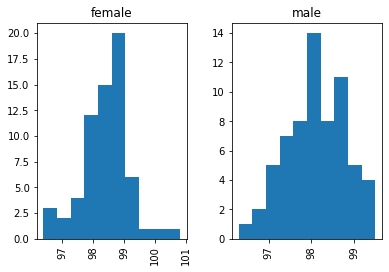

In [58]:
df["temperature"].hist(by=df.gender);

⭐Plot the box plot for both groups side-by-side.

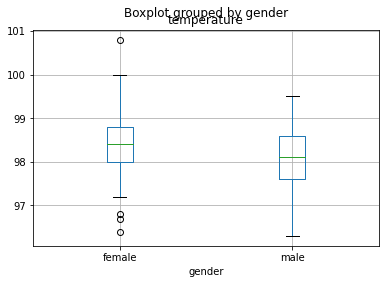

In [56]:
df.boxplot("temperature", by="gender");

⭐**Investigate the given task by using Independent Samples t Test.**

___🚀First, check the normality for both groups. *Use scipy.stats.shapiro*

In [59]:
#Check the normality for male group

stat, p = stats.shapiro(df[df["gender"]=="male"]["temperature"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.855
Sample looks Gaussian (fail to reject H0)


In [61]:
#Check the normality for female group

stat, p = stats.shapiro(df[df["gender"]=="female"]["temperature"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.090
Sample looks Gaussian (fail to reject H0)


___🚀Test the assumption of homogeneity of variance
*Hint: Levene’s Test*

The hypotheses for Levene’s test are: 

<i>H<i/><sub>0</sub>: "the population variances of group 1 and 2 are equal"
    
<i>H<i/><sub>1</sub>: "the population variances of group 1 and 2 are not equal"

In [62]:
stat, p = stats.levene(df[df["gender"]=="female"]["temperature"],df[df["gender"]=="male"]["temperature"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.064, p=0.801
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [64]:
twoSample = stats.ttest_ind(df[df["gender"]=="female"]["temperature"],df[df["gender"]=="male"]["temperature"])
twoSample

Ttest_indResult(statistic=2.2854345381654984, pvalue=0.02393188312240236)

In [65]:
alpha = 0.05
p_value = twoSample.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.


## Task-3. Is There a Relationship Between Body Temperature and Heart Rate?

⭐Plot the scatter plot

⭐Check the normality for heart rate variable

In [ ]:
stat, p = 

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

⭐**Conduct a correlation test**, report Pearson’s correlation coefficient and two-tailed p-value. *Use scipy.stats.pearsonr*

Two-tailed significance test:

H0: ρ = 0 ("the population correlation coefficient is 0; there is no association")

H1: ρ ≠ 0 ("the population correlation coefficient is not 0; a nonzero correlation could exist")

In [ ]:
r = 

⭐**Find a regression equation** to predict heart rate from body temperature.

⭐Calculate the predicted heart rate of a person at the temperature 97 F.

⭐How much of the variation of the heart_rate variable is explained by the temperature variable? *Coefficient of determination (R-squared):*